# Punto 1 

In [1]:
def dfs(graph, start):
    visited, stack = set(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited

graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

dfs(graph, 'A') 

{'A', 'B', 'C', 'D', 'E', 'F'}

# Punto 2

[1.9533338615929097e-05, 7.2836177764656895e-06, 6.621470703294108e-06, 6.290397180919172e-06, 6.290397180919172e-06, 5.9593236585442355e-06, 5.9593236585442355e-06, 9.932206069152016e-06, 5.9593236585442355e-06, 5.959323630122526e-06]


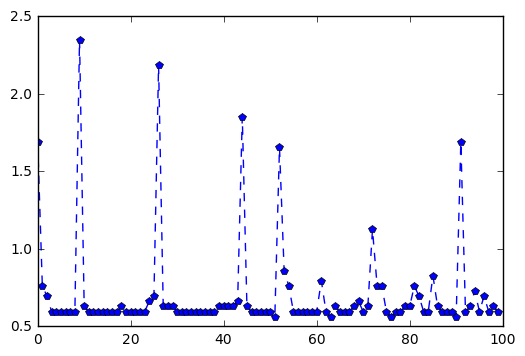

In [12]:
import math
import numpy as np
import pylab as pl
import time 
import random 
import pylab  
import math
import numpy as np


graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

def exper_analysis_time(n):
    results = []
    for i in range(n):
        l = list(range(i))
        random.shuffle(l)
        tic = time.clock()
        dfs(graph, 'A') 
        toc = time.clock()
        results.append((toc-tic))
    return results

print (exper_analysis_time(10))

pylab.clf()
x = np.arange(100)
y = np.array(exper_analysis_time(100))*100000

pylab.plot(x, y, 'p--')
pylab.show()

# Punto 5

In [2]:
from collections import defaultdict, deque


class Graph(object):
    def __init__(self):
        self.nodes = set()
        self.edges = defaultdict(list)
        self.distances = {}

    def add_node(self, value):
        self.nodes.add(value)

    def add_edge(self, from_node, to_node, distance):
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.distances[(from_node, to_node)] = distance


def dijkstra(graph, initial):
    visited = {initial: 0}
    path = {}

    nodes = set(graph.nodes)

    while nodes:
        min_node = None
        for node in nodes:
            if node in visited:
                if min_node is None:
                    min_node = node
                elif visited[node] < visited[min_node]:
                    min_node = node
        if min_node is None:
            break

        nodes.remove(min_node)
        current_weight = visited[min_node]

        for edge in graph.edges[min_node]:
            try:
                weight = current_weight + graph.distances[(min_node, edge)]
            except:
                continue
            if edge not in visited or weight < visited[edge]:
                visited[edge] = weight
                path[edge] = min_node

    return visited, path


def shortest_path(graph, origin, destination):
    visited, paths = dijkstra(graph, origin)
    full_path = deque()
    _destination = paths[destination]

    while _destination != origin:
        full_path.appendleft(_destination)
        _destination = paths[_destination]

    full_path.appendleft(origin)
    full_path.append(destination)

    return visited[destination], list(full_path)

graph = Graph()

for node in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    graph.add_node(node)

graph.add_edge('A', 'B', 10)
graph.add_edge('A', 'C', 20)
graph.add_edge('B', 'D', 15)
graph.add_edge('C', 'D', 30)
graph.add_edge('B', 'E', 50)
graph.add_edge('D', 'E', 30)
graph.add_edge('E', 'F', 5)
graph.add_edge('F', 'G', 2)

print(shortest_path(graph, 'A', 'F')) # output: (25, ['A', 'B', 'D']) 
print(dijkstra(graph,'A'))

(60, ['A', 'B', 'D', 'E', 'F'])
({'A': 0, 'C': 20, 'B': 10, 'E': 55, 'D': 25, 'G': 62, 'F': 60}, {'C': 'A', 'B': 'A', 'E': 'D', 'D': 'B', 'G': 'F', 'F': 'E'})
